In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kachikau bw
busselton au
punta arenas cl
barrow us
mar del plata ar
mazamari pe
hithadhoo mv
iracoubo gf
namibe ao
kodiak us
vila franca do campo pt
vaini to
dunedin nz
cochrane ca
ilulissat gl
east london za
uspenka ru
bac lieu vn
presevo rs
new norfolk au
ust-kuyga ru
bluff nz
sault sainte marie ca
victoria sc
henties bay na
kenai us
port alfred za
antofagasta cl
port alfred za
warri ng
altay cn
avarua ck
cape town za
vestmannaeyjar is
cape town za
punta arenas cl
hithadhoo mv
palu id
jumla np
umzimvubu za
hobart au
saint-philippe re
ilulissat gl
lorengau pg
rikitea pf
bargal so
carman ca
saint-philippe re
pevek ru
oranjestad aw
ushuaia ar
pochutla mx
albany au
kandrian pg
moindou nc
nikolskoye ru
qaanaaq gl
port alfred za
ushuaia ar
mataura pf
quatre cocos mu
kruisfontein za
gat ly
flinders au
busselton au
new norfolk au
bluff nz
peleduy ru
punta arenas cl
rikitea pf
kavaratti in
ushuaia ar
busselton au
airai pw
severo-kurilsk ru
butaritari ki
tigil ru
caravelas br
avarua ck
new nor

rikitea pf
atuona pf
ahipara nz
tuatapere nz
waitati nz
huamachuco pe
kudahuvadhoo mv
loandjili cg
taolanaro mg
innisfail au
manono cd
avera pf
albany au
hermanus za
dikson ru
onda es
togul ru
albany au
new norfolk au
busselton au
punta arenas cl
mataura pf
punta arenas cl
beloha mg
saint george bm
faanui pf
saint george bm
barentsburg sj
kapaa us
norman wells ca
san patricio mx
hobyo so
vaini to
cherskiy ru
beringovskiy ru
tiksi ru
busselton au
grand river south east mu
busselton au
ust-nera ru
bengkulu id
chokurdakh ru
saint-leu re
ngukurr au
manali in
mataura pf
tessalit ml
leningradskiy ru
longyearbyen sj
burton us
mataura pf
ozernovskiy ru
atuona pf
berlevag no
atuona pf
kashi cn
rikitea pf
great bend us
marau br
ushuaia ar
chokurdakh ru
butaritari ki
arraial do cabo br
jamestown sh
netrakona bd
albany au
kodiak us
aquin ht
castro cl
torbay ca
taolanaro mg
beringovskiy ru
eydhafushi mv
tsihombe mg
townsville au
saint-francois gp
murygino ru
castro cl
new norfolk au
albany au
ushua

mount gambier au
vardo no
east london za
atuona pf
ushuaia ar
ushuaia ar
vihti fi
oltu tr
torbay ca
linxia cn
busselton au
illoqqortoormiut gl
khonuu ru
hilo us
kavieng pg
high level ca
bredasdorp za
puerto ayora ec
saskylakh ru
iqaluit ca
mackay au
avarua ck
noshiro jp
hermanus za
koraput in
avarua ck
mackay au
mataura pf
ponta do sol cv
talnakh ru
nikolskoye ru
bambous virieux mu
puerto ayora ec
marawi sd
atuona pf
lebu cl
hasaki jp
kavieng pg
busselton au
lao cai vn


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [8]:
import requests
from config import weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
 
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
       
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d45e75021a47a14255aae7436ea92d35
Processing Record 1 of Set 1 | kachikau
City not found. Skipping...
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | mazamari
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | iracoubo
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | vila franca do campo
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | dunedin
Processing Record 14 of Set 1 | cochrane
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | uspenka
Processing Record 18 of Set 1 | bac lieu
Processing Record 19 of Set 1 | presevo
Processing Record 20 of Se

Processing Record 36 of Set 4 | athabasca
Processing Record 37 of Set 4 | cherskiy
Processing Record 38 of Set 4 | acapulco
Processing Record 39 of Set 4 | labuhan
Processing Record 40 of Set 4 | hwange
Processing Record 41 of Set 4 | guekedou
City not found. Skipping...
Processing Record 42 of Set 4 | santa fe
Processing Record 43 of Set 4 | hilo
Processing Record 44 of Set 4 | sabha
Processing Record 45 of Set 4 | saint-georges
Processing Record 46 of Set 4 | hasaki
Processing Record 47 of Set 4 | troitskoye
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | naron
Processing Record 50 of Set 4 | bridlington
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | san quintin
Processing Record 3 of Set 5 | saravan
Processing Record 4 of Set 5 | port blair
Processing Record 5 of Set 5 | clyde river
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | darhan
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | manokwa

Processing Record 28 of Set 8 | burton
Processing Record 29 of Set 8 | ozernovskiy
Processing Record 30 of Set 8 | kashi
Processing Record 31 of Set 8 | marau
Processing Record 32 of Set 8 | netrakona
Processing Record 33 of Set 8 | aquin
Processing Record 34 of Set 8 | eydhafushi
Processing Record 35 of Set 8 | townsville
Processing Record 36 of Set 8 | saint-francois
Processing Record 37 of Set 8 | murygino
Processing Record 38 of Set 8 | kaka
Processing Record 39 of Set 8 | bandarbeyla
Processing Record 40 of Set 8 | bulawayo
Processing Record 41 of Set 8 | marcona
City not found. Skipping...
Processing Record 42 of Set 8 | bar harbor
Processing Record 43 of Set 8 | lata
Processing Record 44 of Set 8 | champerico
Processing Record 45 of Set 8 | galbshtadt
Processing Record 46 of Set 8 | caiaponia
Processing Record 47 of Set 8 | palmer
Processing Record 48 of Set 8 | bontang
Processing Record 49 of Set 8 | kahului
Processing Record 50 of Set 8 | riaba
City not found. Skipping...
Proc

Processing Record 17 of Set 12 | volta redonda
Processing Record 18 of Set 12 | onega
Processing Record 19 of Set 12 | muroto
Processing Record 20 of Set 12 | dudinka
Processing Record 21 of Set 12 | naze
Processing Record 22 of Set 12 | forrest city
Processing Record 23 of Set 12 | chapais
Processing Record 24 of Set 12 | owando
Processing Record 25 of Set 12 | cuitareo
Processing Record 26 of Set 12 | terrace bay
Processing Record 27 of Set 12 | baykit
Processing Record 28 of Set 12 | rio grande
Processing Record 29 of Set 12 | mufulira
Processing Record 30 of Set 12 | bosaso
Processing Record 31 of Set 12 | smoky lake
Processing Record 32 of Set 12 | yanam
Processing Record 33 of Set 12 | khani
Processing Record 34 of Set 12 | maningrida
Processing Record 35 of Set 12 | cayenne
Processing Record 36 of Set 12 | jacareacanga
Processing Record 37 of Set 12 | ambilobe
Processing Record 38 of Set 12 | nizwa
Processing Record 39 of Set 12 | san vicente
Processing Record 40 of Set 12 | var

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,69.28,76,5,8.14,AU,2021-01-23 00:22:23
1,Punta Arenas,-53.1500,-70.9167,55.40,38,75,18.41,CL,2021-01-23 00:22:23
2,Barrow,71.2906,-156.7887,8.60,78,90,26.46,US,2021-01-23 00:18:14
3,Mar Del Plata,-38.0023,-57.5575,73.00,88,0,8.05,AR,2021-01-23 00:20:23
4,Mazamari,-11.3258,-74.5308,73.90,70,36,0.69,PE,2021-01-23 00:22:24
5,Hithadhoo,-0.6000,73.0833,81.82,70,64,5.17,MV,2021-01-23 00:22:24
6,Iracoubo,5.4802,-53.2011,76.86,89,100,8.37,GF,2021-01-23 00:22:24
7,Namibe,-15.1961,12.1522,73.96,71,99,4.41,AO,2021-01-23 00:22:24
8,Kodiak,57.7900,-152.4072,39.20,93,90,6.51,US,2021-01-23 00:22:24
9,Vila Franca Do Campo,37.7167,-25.4333,62.01,100,20,18.41,PT,2021-01-23 00:22:24


In [12]:
#Reorder columns
new_column_order = ["city", "country", "Date", "Lat", "Long","MaxTemp", "Humidity", "Cloudiness","windspeed"]
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,69.28,76,5,8.14,AU,2021-01-23 00:22:23
1,Punta Arenas,-53.1500,-70.9167,55.40,38,75,18.41,CL,2021-01-23 00:22:23
2,Barrow,71.2906,-156.7887,8.60,78,90,26.46,US,2021-01-23 00:18:14
3,Mar Del Plata,-38.0023,-57.5575,73.00,88,0,8.05,AR,2021-01-23 00:20:23
4,Mazamari,-11.3258,-74.5308,73.90,70,36,0.69,PE,2021-01-23 00:22:24
5,Hithadhoo,-0.6000,73.0833,81.82,70,64,5.17,MV,2021-01-23 00:22:24
6,Iracoubo,5.4802,-53.2011,76.86,89,100,8.37,GF,2021-01-23 00:22:24
7,Namibe,-15.1961,12.1522,73.96,71,99,4.41,AO,2021-01-23 00:22:24
8,Kodiak,57.7900,-152.4072,39.20,93,90,6.51,US,2021-01-23 00:22:24
9,Vila Franca Do Campo,37.7167,-25.4333,62.01,100,20,18.41,PT,2021-01-23 00:22:24


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

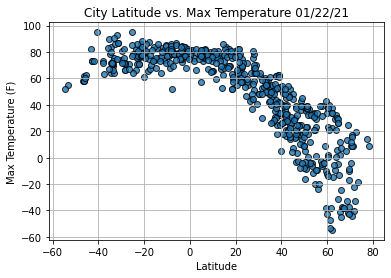

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data")

# Show plot.
plt.show()

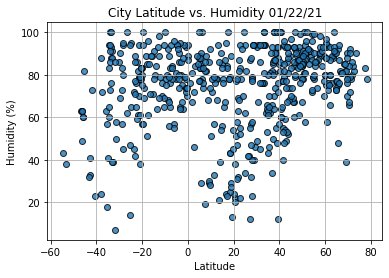

In [16]:
# 6.3.2# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data")
# Show plot.
plt.show()

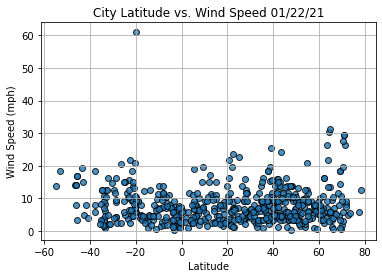

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# 6.4.2

In [19]:
# Import linregress
from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Ilulissat
Lat                       69.2167
Lng                         -51.1
Max Temp                     24.8
Humidity                       39
Cloudiness                     26
Wind Speed                  18.41
Country                        GL
Date          2021-01-23 00:22:25
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
547    False
548     True
549     True
550     True
551     True
Name: Lat, Length: 552, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Barrow,71.2906,-156.7887,8.60,78,90,26.46,US,2021-01-23 00:18:14
6,Iracoubo,5.4802,-53.2011,76.86,89,100,8.37,GF,2021-01-23 00:22:24
8,Kodiak,57.7900,-152.4072,39.20,93,90,6.51,US,2021-01-23 00:22:24
9,Vila Franca Do Campo,37.7167,-25.4333,62.01,100,20,18.41,PT,2021-01-23 00:22:24
12,Cochrane,51.1834,-114.4687,23.00,58,1,3.44,CA,2021-01-23 00:22:25


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

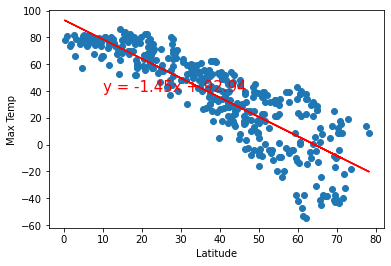

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

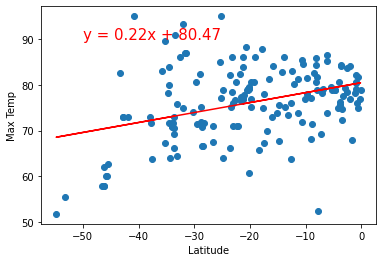

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

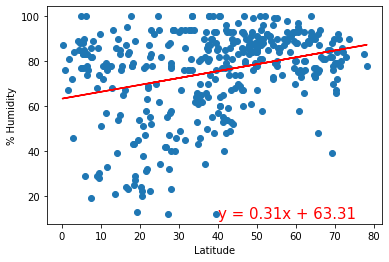

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

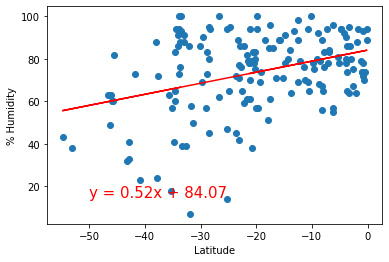

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [ ]:
#6.4.4 Find the Correlation Between Latitude and Percent Cloudiness


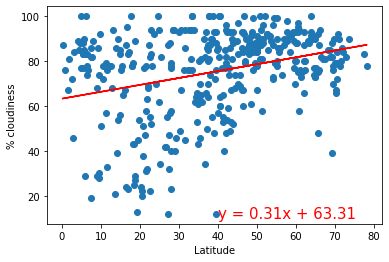

In [30]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'percent cloudiness in the Northern Hemisphere \
                        for % cloudiness', '% cloudiness',(40,10))

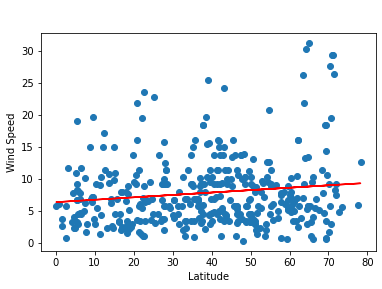

In [36]:
#6.4.5 Find the Correlation Between Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,  
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

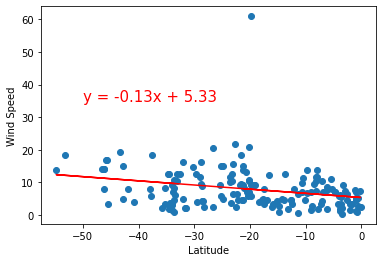

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [39]:
 #6.5.1 Set Up Google Maps and Places API
    # Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (C:\Users\Timerson\OneDrive\Desktop\Vander Files\Class Modules\World_Weather_Analysis\config.py)

In [ ]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()